<a href="https://colab.research.google.com/github/Kashaf-Zia06/AI-Powered-Image-Caption-Generator/blob/main/Imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Step 1: Imports ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# --- Step 2: Load CIFAR-10 dataset ---
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [4]:
# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])
print("Image shape:", x_train.shape[1:])

Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)


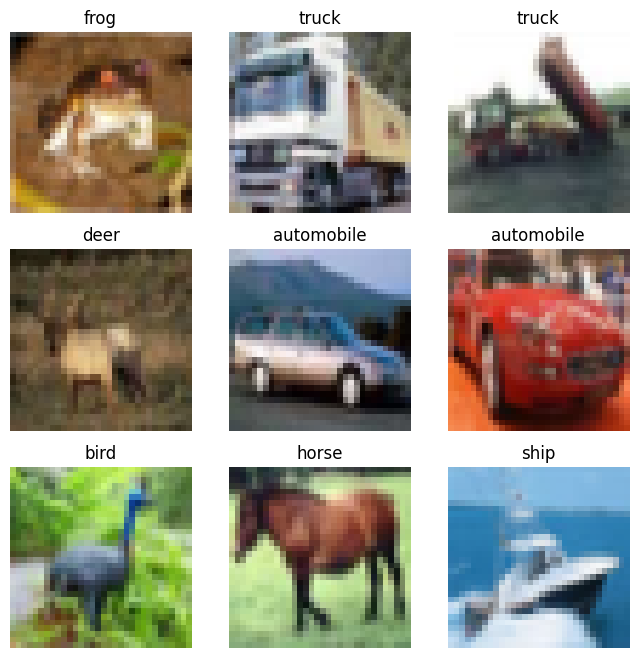

In [5]:
class_names = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [6]:
# --- Step 4: Build CNN model ---
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")   # 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# --- Step 5: Compile ---
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [9]:
# --- Step 6: Train ---
history = model.fit(
    x_train, y_train,
    epochs=20,               # keep small for demo
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7722 - loss: 0.6549 - val_accuracy: 0.6961 - val_loss: 0.8845
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7794 - loss: 0.6350 - val_accuracy: 0.7089 - val_loss: 0.8740
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7849 - loss: 0.6098 - val_accuracy: 0.7175 - val_loss: 0.8553
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7974 - loss: 0.5753 - val_accuracy: 0.7013 - val_loss: 0.9066
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8088 - loss: 0.5424 - val_accuracy: 0.7099 - val_loss: 0.8780
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8151 - loss: 0.5282 - val_accuracy: 0.7141 - val_loss: 0.8868
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8274 - loss: 0.4940 - val_accuracy: 0.7162 - val_loss: 0.8891
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8349 - loss: 0.4626 - val_accuracy: 0.

In [10]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.6980


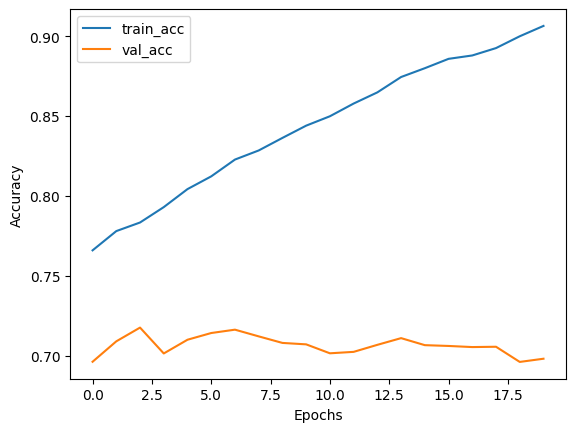

In [11]:
# --- Step 8: Plot learning curves ---
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


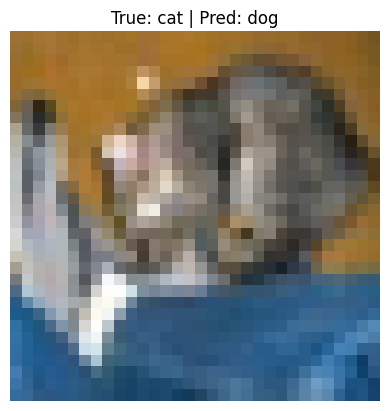

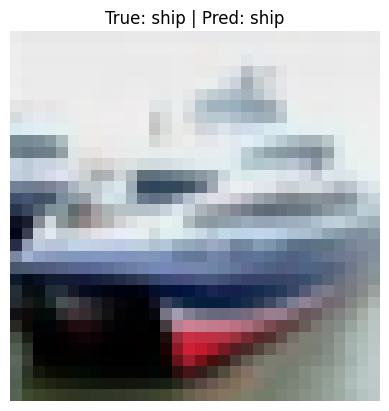

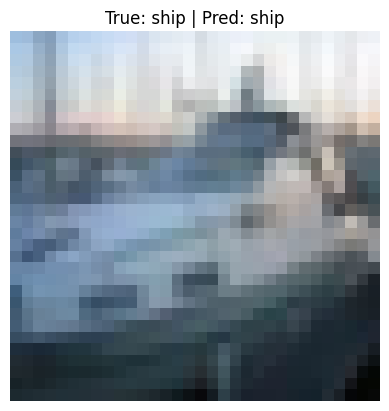

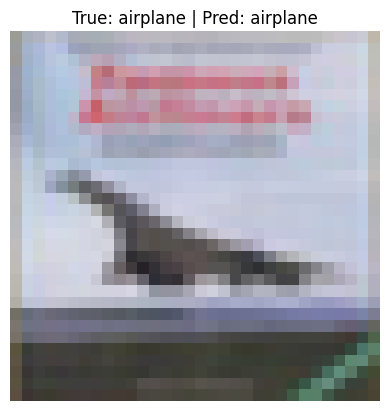

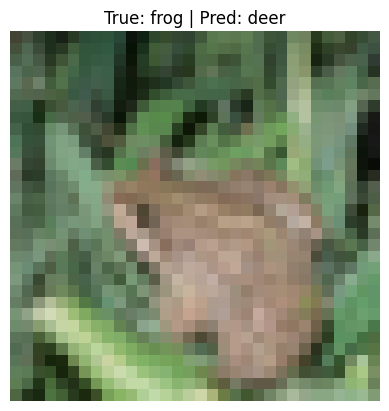

In [12]:
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_test[i]]} | Pred: {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")
    plt.show()